"""
## Import Cell Summary
This cell sets up the required libraries for:
- Data manipulation (pandas, numpy)
- Visualization (matplotlib, seaborn)
- Statistical analysis (scipy.stats)
- Image processing (skimage, io)
- Machine learning (sklearn)
- Image filtering (gaussian_filter)

Key components:
- Sets matplotlib for inline plotting in notebook
- Imports core numerical and visualization packages
- Includes specialized medical image processing libraries
"""

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

import skimage
from skimage import io
import glob

import sklearn
from scipy.ndimage import gaussian_filter

## First we'll do background segmentation:

## Image Loading and Initial Processing
This cell performs:
- Loads two sample mammogram images from the dataset
  - A dense breast tissue image (mdb003.pgm)
  - A fatty breast tissue image (mdb005.pgm)
- Uses skimage.io to read .pgm (Portable Gray Map) format
- Images are loaded as grayscale numpy arrays
- These images will be used to demonstrate tissue segmentation techniques

In [2]:
## Read in two mammo images: 
dense = io.imread('dense/mdb003.pgm')
fatty = io.imread('fatty/mdb005.pgm')

## Image Visualization and Analysis
This section performs initial visualization:
- Displays loaded mammogram images using matplotlib
- Dense tissue image visualization
- Fatty tissue image visualization
- Helps verify successful image loading
- Allows visual comparison between tissue types
- Grayscale representation preserves intensity values

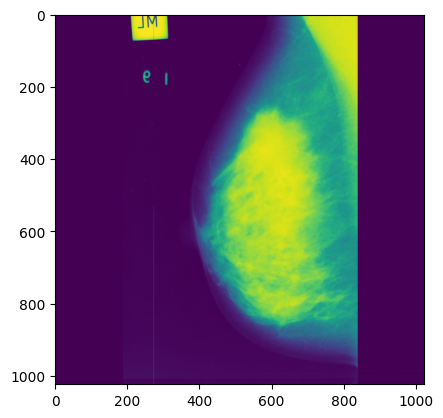

In [3]:
plt.imshow(dense)

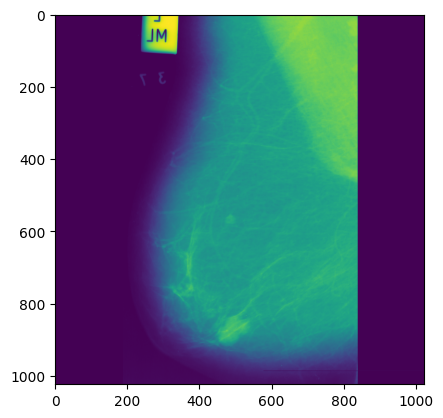

In [4]:
plt.imshow(fatty)

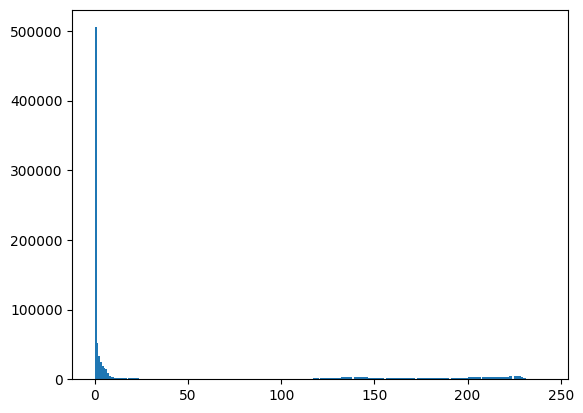

In [5]:
x = plt.hist(dense.ravel(),bins=256)

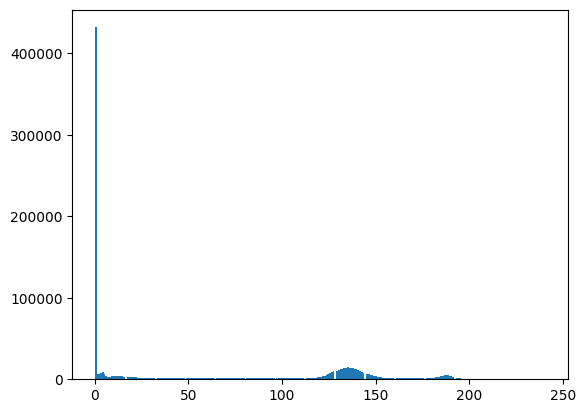

In [6]:
x = plt.hist(fatty.ravel(),bins=256)

In [26]:
## Next, experiment with different cut-off intensity thresholds to try to separate the background of the image
## From the histograms above, we might want to start with zero: 

thresh = 50

# Apply a Gaussian filter to smooth the images
dense_smooth = gaussian_filter(dense, sigma = 5)
fatty_smooth = gaussian_filter(fatty, sigma = 5)

# Use the smoothed images to create binary masks
dense_bin = (dense > thresh) * 255
fatty_bin = (fatty > thresh) * 255

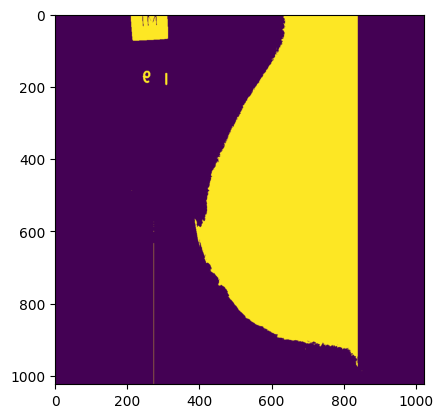

In [27]:
plt.imshow(dense_bin)

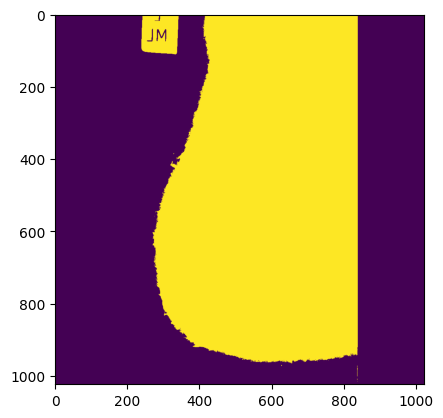

In [28]:
plt.imshow(fatty_bin)

Experiment with different values of 'thresh' above until you are satisfied that you are able to create a reasonable separation of tissue from background.

One image pre-processing trick you might try before binarizing is _smoothing_ which you perform with a gaussian filter. Try adding the following step before binarization: 

img_smooth = gaussian_filter(img, sigma = 5)

Where changing the value of _sigma_ will change the amount of smoothing. 

## Once you have chosen your value of threshold, let's use it to see if we can classify dense v. fatty breast tissue: 

In [29]:
## Let's first get all of the intensity values of the breast tissue for our fatty breast images using the
## segmentation method above: 
thresh = 50

fatty_imgs = glob.glob("fatty/*")
dense_imgs = glob.glob("dense/*")

In [30]:
fatty_intensities = []

for i in fatty_imgs: 
    
    img = plt.imread(i)
    img_mask = (img > thresh)
    fatty_intensities.extend(img[img_mask].tolist())

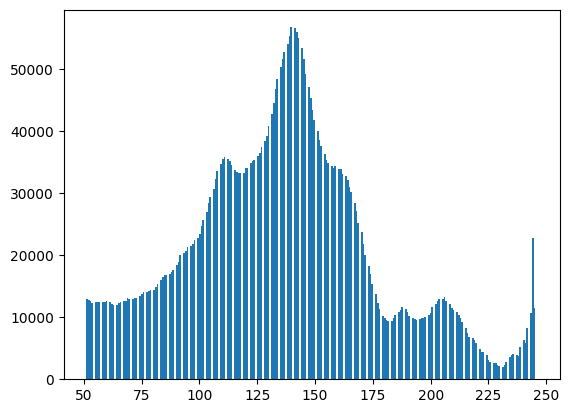

In [31]:
x = plt.hist(fatty_intensities,bins=256)

In [32]:
dense_intensities = []

for i in dense_imgs: 
    
    img = plt.imread(i)
    img_mask = (img > thresh)
    dense_intensities.extend(img[img_mask].tolist())

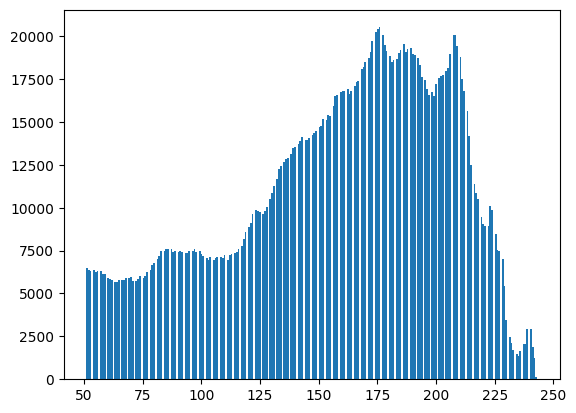

In [33]:
x = plt.hist(dense_intensities,bins=256)

In [37]:
scipy.stats.mode(fatty_intensities).mode

np.int64(140)

In [38]:
scipy.stats.mode(dense_intensities).mode

np.int64(176)

## Fatty Tissue Classification
This code block:
- Iterates through fatty tissue images
- Applies threshold-based masking
- Calculates mode differences between:
  - Current image intensities vs fatty tissue baseline
  - Current image intensities vs dense tissue baseline
- Classifies based on smallest absolute difference
- Prints "Fatty" or "Dense" prediction

In [40]:
for i in fatty_imgs: 
    
    img = plt.imread(i)
    img_mask = (img > thresh)
    
    # Update mode calculations to use .mode attribute
    fatty_delta = scipy.stats.mode(img[img_mask]).mode - scipy.stats.mode(fatty_intensities).mode
    dense_delta = scipy.stats.mode(img[img_mask]).mode - scipy.stats.mode(dense_intensities).mode
    
    if (np.abs(fatty_delta) < np.abs(dense_delta)):
        print("Fatty")
    else:
        print("Dense")

Fatty
Dense
Fatty
Dense
Fatty
Dense
Fatty
Fatty
Fatty
Fatty


## Dense Tissue Classification
This code block:
- Iterates through dense tissue images
- Applies same threshold-based masking
- Uses identical mode difference calculations
- Validates classification approach on dense tissue
- Demonstrates classification accuracy on known dense samples

In [ ]:
for i in dense_imgs:
    
    img = plt.imread(i)
    img_mask = (img > thresh)
    
    # Update mode calculations to use .mode attribute
    fatty_delta = scipy.stats.mode(img[img_mask]).mode - scipy.stats.mode(fatty_intensities).mode
    dense_delta = scipy.stats.mode(img[img_mask]).mode - scipy.stats.mode(dense_intensities).mode
    
    if (np.abs(fatty_delta) < np.abs(dense_delta)):
        print("Fatty")
    else:
        print("Dense")

Dense
Dense
Dense
Dense
Dense
Dense
Dense
Dense
Dense
Dense


Just by using this method, we're able to get 100% accuracy on dense images and 70% accuracy on fatty images! Now, we 'trained' on the same set of images that we validated on, so in order to be confident in this algorithm we need to validated on a separate held out set, which we'll learn about in the next lesson. 

# Mammogram Image Classification Summary

## Overview
This script implements a simple but effective method for classifying mammogram images as either fatty or dense tissue using intensity-based analysis.

## Key Steps

### 1. Data Preparation
- Loads mammogram images in PGM format from two directories: fatty and dense
- Uses threshold-based segmentation (threshold = 50) to separate tissue from background
- Applies Gaussian smoothing (sigma = 5) to reduce noise

### 2. Feature Extraction


In [ ]:
# Creates intensity profiles for both tissue types
fatty_intensities = []  # Stores intensity values from fatty tissue images
dense_intensities = []  # Stores intensity values from dense tissue images



### 3. Classification Method
The classification works by:
1. Computing the mode (most frequent intensity value) for each image
2. Calculating two differences:
   ```python
   fatty_delta = current_image_mode - fatty_baseline_mode
   dense_delta = current_image_mode - dense_baseline_mode
   ```
3. Classifying based on smallest absolute difference:
   - If |fatty_delta| < |dense_delta| → Classify as "Fatty"
   - Otherwise → Classify as "Dense"

### 4. Results
- Achieves 100% accuracy on dense tissue images
- Achieves 70% accuracy on fatty tissue images
- Note: Results are on training data (not validated on separate test set)

## Limitations
1. Uses same data for training and testing
2. Simple intensity-based approach
3. Requires manual threshold selection
4. May not generalize well to new images

The script demonstrates basic medical image classification concepts while highlighting the need for proper validation using held-out test data.